## Firstly we need to clone YOLOv5 repository from git and upload the images and annotations into the ‘data’ folder of repository.

In [ ]:
!git clone https://github.com/ultralytics/yolov5

## Installing the requirements.txt file

In [ ]:
!pip install -r /content/yolov5/requirements.txt

## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt

## Importing the model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

## Loading images

In [ ]:
img = '/content/train/images/hard_hat_workers0_png.rf.da116ad02313bd9b16aa53234a42750f.jpg' # Path of the image
results = model(img) # Predicting on the image
results.print() # Shows the output
%matplotlib inline 
plt.imshow(np.squeeze(model(img).render())) # Makes the predicted image readible to matplotlib
plt.show()

## Training the model for 40 epochs, images size 640 and batch of 40. In dataset.yml file we have to define the path of images, labels, path, classes name and how many classes are there in the 4750 images of training dataset.

In [ ]:
!cd /content/yolov5 && python train.py --img 640 --batch 40 --epochs 40 --data dataset.yml --weights yolov5s.pt --workers 2

## After training for 40 epochs got precision of 0.92, recall 0.90 and mAP_0.5 as 0.95.

## After training, ‘last.pt’ in this file the trained weights gets saved then using this files made predictions on the test images and videos.

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=r'D:\CV intern\last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Acer/.cache\torch\hub\master.zip
YOLOv5  2022-11-12 Python-3.9.7 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients
Adding AutoShape... 


## Predicting on images the model is able to easily detect the helmets as can be seen in below image.

image 1/1: 416x416 5 helmets, 1 person
Speed: 442.7ms pre-process, 1137.8ms inference, 193.6ms NMS per image at shape (1, 3, 640, 640)


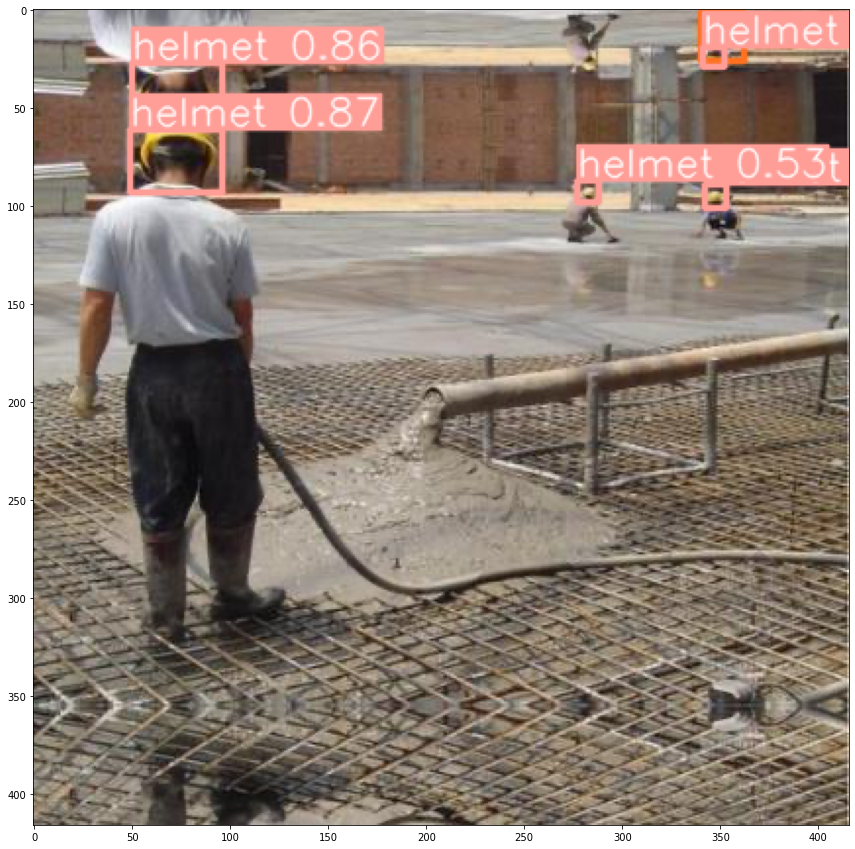

In [5]:
img = r'D:\HardHat_Test_Images\Images\hard_hat_workers2131.png'
results = model(img)
results.print()
%matplotlib inline 
plt.figure(figsize=(100, 15))
plt.imshow(np.squeeze(results.render()))
plt.show()

In [6]:
import glob
import os
folder = os.path.join('D:\\','HardHat_Test_Images','Images') # Path to 250 images

In [7]:
direct = 'D:\\HardHat_Test_Images\\Images\\' # Path to images
listing = [] # storing results in the list
images_dir = [direct + f for f in ('hard_hat_workers12.png',
'hard_hat_workers34.png','hard_hat_workers43.png')] # Looping through multiple images
resu = model(images_dir) # Making predictions
resu.print()
print(images_dir) # Prints the image name
resu.xyxy[0] # Shows bounding box co-ordinates xmin, ymin, xmax, ymax, confidence, class, name
resu.pandas().xyxy[0] # makes a pandas dataframe of the outputs

image 1/3: 415x416 3 helmets
image 2/3: 415x416 8 helmets
image 3/3: 416x416 4 heads, 5 helmets
Speed: 73.0ms pre-process, 501.0ms inference, 1.0ms NMS per image at shape (3, 3, 640, 640)


['D:\\HardHat_Test_Images\\Images\\hard_hat_workers12.png', 'D:\\HardHat_Test_Images\\Images\\hard_hat_workers34.png', 'D:\\HardHat_Test_Images\\Images\\hard_hat_workers43.png']


,xmin,ymin,xmax,ymax,confidence,class,name
0,300.100037,181.192276,325.279114,208.324417,0.649843,1,helmet
1,251.845871,168.337265,272.932220,188.736572,0.625212,1,helmet
2,69.041573,164.599380,92.880936,188.240952,0.577207,1,helmet


## Following code is used to process the provided YouTube video with the detections.

In [ ]:
cap = cv2.VideoCapture(r'E:\DATA SCIENCE\MLOps\mlops\Advanced safety helmets for the construction industry.mp4') # cv2.VideoCapture function loads the video from the given file path.
out = cv2.VideoWriter('Helmets_detection.webm',cv2.VideoWriter_fourcc('V','P','8','0'), 20, (1280, 720)) # cv2.Videowriter writes the processed video with detections.
while cap.isOpened():
    ret, frame = cap.read() 
    frame = cv2.resize(frame, dsize=(1280, 720), fx=2, fy=2)
    # Make detections 
    results = model(frame)
    out.write(np.squeeze(results.render()))
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [38]:
list_storing_Res = [] # storing results in the list
for images in glob.iglob(f'{folder}/*'): # Looping through 250 test images
    print(images)
    res = model(images)
    res.print()
    res.xyxy[0]
    list_storing_Res.append(res.xyxy)


D:\HardHat_Test_Images\Images\hard_hat_workers1015.png


image 1/1: 416x415 1 helmet
Speed: 72.0ms pre-process, 452.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1018.png


image 1/1: 415x416 4 helmets
Speed: 69.0ms pre-process, 443.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1031.png


image 1/1: 416x416 2 helmets
Speed: 61.0ms pre-process, 428.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1044.png


image 1/1: 415x416 1 helmet
Speed: 58.0ms pre-process, 448.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1068.png


image 1/1: 415x416 3 helmets
Speed: 58.0ms pre-process, 497.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1072.png


image 1/1: 416x416 2 helmets
Speed: 58.0ms pre-process, 450.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1095.png


image 1/1: 416x416 7 helmets
Speed: 24.0ms pre-process, 432.3ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1102.png


image 1/1: 416x416 3 helmets
Speed: 57.0ms pre-process, 446.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1109.png


image 1/1: 415x416 6 helmets
Speed: 66.0ms pre-process, 430.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1123.png


image 1/1: 415x416 1 helmet
Speed: 62.0ms pre-process, 446.5ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1188.png


image 1/1: 415x416 5 helmets
Speed: 58.0ms pre-process, 457.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers119.png


image 1/1: 416x416 2 helmets
Speed: 66.0ms pre-process, 422.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers12.png


image 1/1: 415x416 3 helmets
Speed: 19.0ms pre-process, 448.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers121.png


image 1/1: 415x416 13 helmets
Speed: 57.0ms pre-process, 435.4ms inference, 33.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1228.png


image 1/1: 416x416 1 helmet
Speed: 58.0ms pre-process, 445.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1294.png


image 1/1: 416x416 5 helmets
Speed: 58.0ms pre-process, 445.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1321.png


image 1/1: 415x416 2 helmets
Speed: 55.7ms pre-process, 437.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1335.png


image 1/1: 416x415 9 helmets
Speed: 61.0ms pre-process, 428.3ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1348.png


image 1/1: 415x416 1 helmet
Speed: 66.0ms pre-process, 431.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1372.png


image 1/1: 416x416 3 helmets
Speed: 58.0ms pre-process, 436.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1374.png


image 1/1: 415x416 1 helmet
Speed: 58.0ms pre-process, 446.2ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1391.png


image 1/1: 415x416 2 helmets
Speed: 22.6ms pre-process, 440.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1456.png


image 1/1: 416x416 11 helmets
Speed: 27.0ms pre-process, 455.9ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1543.png


image 1/1: 416x415 5 helmets
Speed: 56.0ms pre-process, 438.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1548.png


image 1/1: 415x416 3 helmets
Speed: 61.0ms pre-process, 436.9ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1563.png


image 1/1: 416x416 2 helmets
Speed: 60.0ms pre-process, 435.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1574.png


image 1/1: 416x416 5 helmets
Speed: 33.6ms pre-process, 454.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1578.png


image 1/1: 415x416 8 helmets
Speed: 57.0ms pre-process, 445.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1586.png


image 1/1: 416x416 1 helmet
Speed: 69.0ms pre-process, 420.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1598.png


image 1/1: 415x416 12 helmets
Speed: 67.2ms pre-process, 438.2ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1662.png


image 1/1: 415x416 2 helmets
Speed: 59.1ms pre-process, 490.1ms inference, 3.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1673.png


image 1/1: 416x416 2 helmets
Speed: 66.4ms pre-process, 483.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1684.png


image 1/1: 416x416 4 helmets
Speed: 60.8ms pre-process, 481.1ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1697.png


image 1/1: 416x416 4 heads, 6 helmets
Speed: 68.0ms pre-process, 484.6ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1703.png


image 1/1: 416x416 6 heads, 7 helmets
Speed: 62.2ms pre-process, 452.4ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1721.png


image 1/1: 416x415 1 helmet
Speed: 51.2ms pre-process, 471.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1724.png


image 1/1: 416x416 11 heads, 2 helmets
Speed: 57.0ms pre-process, 467.3ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1782.png


image 1/1: 415x416 2 helmets
Speed: 28.0ms pre-process, 568.2ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers179.png


image 1/1: 416x416 7 heads, 1 helmet
Speed: 58.7ms pre-process, 479.5ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1796.png


image 1/1: 415x416 4 helmets
Speed: 61.1ms pre-process, 473.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers182.png


image 1/1: 415x416 4 helmets
Speed: 31.8ms pre-process, 482.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1832.png


image 1/1: 416x416 4 helmets
Speed: 60.4ms pre-process, 474.9ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers184.png


image 1/1: 415x416 1 helmet
Speed: 55.8ms pre-process, 458.2ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1848.png


image 1/1: 416x416 1 helmet
Speed: 28.0ms pre-process, 448.2ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1854.png


image 1/1: 416x416 2 helmets
Speed: 63.0ms pre-process, 458.9ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1866.png


image 1/1: 415x416 1 helmet
Speed: 28.0ms pre-process, 457.3ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1877.png


image 1/1: 415x416 4 helmets
Speed: 67.3ms pre-process, 463.4ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1885.png


image 1/1: 415x416 6 helmets
Speed: 46.0ms pre-process, 457.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1918.png


image 1/1: 415x416 1 head, 3 helmets, 2 persons
Speed: 23.0ms pre-process, 471.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers192.png


image 1/1: 416x416 7 helmets
Speed: 29.0ms pre-process, 661.9ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1952.png


image 1/1: 415x416 7 helmets
Speed: 66.5ms pre-process, 514.1ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1961.png


image 1/1: 416x416 2 helmets
Speed: 66.8ms pre-process, 504.6ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers1982.png


image 1/1: 416x416 1 head, 4 helmets
Speed: 67.4ms pre-process, 467.9ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2003.png


image 1/1: 416x416 1 head, 1 helmet
Speed: 65.0ms pre-process, 464.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2019.png


image 1/1: 416x416 5 helmets
Speed: 66.3ms pre-process, 461.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2062.png


image 1/1: 416x416 2 helmets
Speed: 63.8ms pre-process, 472.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2063.png


image 1/1: 416x415 4 helmets
Speed: 66.2ms pre-process, 463.3ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2070.png


image 1/1: 415x416 1 helmet
Speed: 60.0ms pre-process, 497.8ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2075.png


image 1/1: 416x416 2 helmets
Speed: 27.2ms pre-process, 490.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2093.png


image 1/1: 416x416 1 head, 5 helmets
Speed: 27.2ms pre-process, 487.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers210.png


image 1/1: 415x416 12 helmets
Speed: 28.0ms pre-process, 455.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2113.png


image 1/1: 416x416 9 heads
Speed: 56.6ms pre-process, 530.9ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2123.png


image 1/1: 416x416 3 helmets, 1 person
Speed: 27.2ms pre-process, 480.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2131.png


image 1/1: 416x416 5 helmets, 1 person
Speed: 18.7ms pre-process, 467.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2171.png


image 1/1: 416x416 8 heads, 1 helmet
Speed: 58.7ms pre-process, 477.2ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2200.png


image 1/1: 416x416 9 helmets
Speed: 66.0ms pre-process, 475.6ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers221.png


image 1/1: 415x416 2 helmets
Speed: 24.4ms pre-process, 468.3ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers223.png


image 1/1: 416x416 1 helmet
Speed: 64.5ms pre-process, 451.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2244.png


image 1/1: 415x416 5 helmets
Speed: 75.7ms pre-process, 461.2ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2274.png


image 1/1: 415x416 10 heads
Speed: 26.0ms pre-process, 448.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2289.png


image 1/1: 415x416 29 heads
Speed: 67.0ms pre-process, 468.2ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2295.png


image 1/1: 415x416 2 helmets
Speed: 32.1ms pre-process, 473.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2309.png


image 1/1: 415x416 1 helmet, 2 persons
Speed: 28.2ms pre-process, 456.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2332.png


image 1/1: 416x416 1 helmet
Speed: 66.0ms pre-process, 466.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2340.png


image 1/1: 415x416 10 helmets
Speed: 26.0ms pre-process, 481.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2363.png


image 1/1: 415x416 1 head, 14 helmets
Speed: 63.1ms pre-process, 468.2ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2365.png


image 1/1: 416x416 1 head
Speed: 41.3ms pre-process, 464.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers237.png


image 1/1: 415x416 1 helmet
Speed: 64.4ms pre-process, 469.3ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers238.png


image 1/1: 416x416 1 helmet
Speed: 27.5ms pre-process, 469.9ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2408.png


image 1/1: 415x416 6 helmets
Speed: 26.6ms pre-process, 467.8ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2441.png


image 1/1: 416x416 3 helmets
Speed: 55.5ms pre-process, 476.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2454.png


image 1/1: 415x416 14 helmets
Speed: 28.0ms pre-process, 452.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers246.png


image 1/1: 415x416 3 helmets
Speed: 27.0ms pre-process, 520.9ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2496.png


image 1/1: 416x416 6 heads, 11 helmets
Speed: 69.3ms pre-process, 462.5ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2545.png


image 1/1: 416x416 1 helmet
Speed: 63.0ms pre-process, 477.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2547.png


image 1/1: 415x416 2 helmets
Speed: 61.8ms pre-process, 454.0ms inference, 2.5ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2554.png


image 1/1: 415x416 8 helmets
Speed: 26.1ms pre-process, 473.3ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers261.png


image 1/1: 416x416 1 helmet
Speed: 23.0ms pre-process, 452.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2617.png


image 1/1: 416x416 2 helmets
Speed: 57.0ms pre-process, 470.4ms inference, 2.7ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2701.png


image 1/1: 416x416 11 heads
Speed: 29.9ms pre-process, 479.8ms inference, 2.1ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2705.png


image 1/1: 415x416 4 helmets
Speed: 67.8ms pre-process, 493.8ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2707.png


image 1/1: 415x416 16 helmets
Speed: 30.3ms pre-process, 496.2ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2713.png


image 1/1: 416x416 1 helmet
Speed: 26.7ms pre-process, 511.2ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2716.png


image 1/1: 416x415 2 helmets
Speed: 28.6ms pre-process, 479.2ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2728.png


image 1/1: 416x416 4 helmets
Speed: 30.1ms pre-process, 485.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers273.png


image 1/1: 415x416 2 helmets
Speed: 65.4ms pre-process, 460.5ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2786.png


image 1/1: 416x416 4 heads, 2 helmets
Speed: 30.0ms pre-process, 482.6ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2794.png


image 1/1: 415x416 5 helmets
Speed: 65.5ms pre-process, 461.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2803.png


image 1/1: 416x416 2 helmets
Speed: 70.0ms pre-process, 476.4ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2818.png


image 1/1: 416x416 1 helmet
Speed: 61.5ms pre-process, 479.1ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2824.png


image 1/1: 415x416 1 helmet
Speed: 62.5ms pre-process, 467.3ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2880.png


image 1/1: 416x416 2 heads, 8 helmets, 1 person
Speed: 59.0ms pre-process, 476.4ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2889.png


image 1/1: 416x416 2 helmets
Speed: 58.2ms pre-process, 503.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2897.png


image 1/1: 415x416 2 helmets
Speed: 66.7ms pre-process, 437.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2899.png


image 1/1: 415x416 1 head, 10 helmets
Speed: 27.0ms pre-process, 470.5ms inference, 2.3ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers292.png


image 1/1: 415x416 4 helmets
Speed: 43.4ms pre-process, 474.3ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2942.png


image 1/1: 416x416 2 helmets
Speed: 27.5ms pre-process, 462.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2950.png


image 1/1: 416x416 1 helmet
Speed: 67.7ms pre-process, 466.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2961.png


image 1/1: 416x416 6 helmets
Speed: 67.4ms pre-process, 468.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2983.png


image 1/1: 416x416 2 heads, 5 helmets
Speed: 31.7ms pre-process, 481.2ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2985.png


image 1/1: 415x416 1 head, 7 helmets
Speed: 56.7ms pre-process, 468.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers2998.png


image 1/1: 416x415 1 helmet
Speed: 71.1ms pre-process, 470.2ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3011.png


image 1/1: 415x416 13 helmets
Speed: 64.0ms pre-process, 468.6ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers302.png


image 1/1: 415x416 6 heads
Speed: 27.7ms pre-process, 465.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3030.png


image 1/1: 416x416 2 helmets
Speed: 62.5ms pre-process, 465.7ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3034.png


image 1/1: 416x416 2 helmets
Speed: 63.2ms pre-process, 463.5ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3044.png


image 1/1: 415x416 6 helmets
Speed: 63.4ms pre-process, 469.3ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers306.png


image 1/1: 416x416 25 heads
Speed: 28.2ms pre-process, 463.0ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3076.png


image 1/1: 416x416 3 helmets
Speed: 67.8ms pre-process, 456.4ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3174.png


image 1/1: 416x416 2 helmets
Speed: 28.0ms pre-process, 458.3ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3180.png


image 1/1: 416x416 5 helmets
Speed: 31.0ms pre-process, 505.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3187.png


image 1/1: 416x415 2 helmets
Speed: 61.7ms pre-process, 461.1ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3221.png


image 1/1: 415x416 3 helmets
Speed: 29.2ms pre-process, 549.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3254.png


image 1/1: 416x416 1 head, 4 helmets
Speed: 28.3ms pre-process, 443.8ms inference, 2.6ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3262.png


image 1/1: 415x416 5 helmets
Speed: 55.2ms pre-process, 469.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers329.png


image 1/1: 415x416 10 helmets
Speed: 67.0ms pre-process, 477.6ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3291.png


image 1/1: 415x416 1 helmet
Speed: 63.1ms pre-process, 472.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3301.png


image 1/1: 416x416 3 helmets
Speed: 26.6ms pre-process, 490.3ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3314.png


image 1/1: 415x416 4 heads
Speed: 25.2ms pre-process, 516.3ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3320.png


image 1/1: 415x416 3 helmets
Speed: 33.4ms pre-process, 558.9ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3325.png


image 1/1: 416x416 2 helmets
Speed: 29.5ms pre-process, 504.2ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3352.png


image 1/1: 415x416 14 helmets
Speed: 32.0ms pre-process, 493.4ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3366.png


image 1/1: 415x416 2 helmets
Speed: 28.5ms pre-process, 481.3ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3383.png


image 1/1: 416x415 3 heads, 5 helmets
Speed: 63.1ms pre-process, 476.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers34.png


image 1/1: 415x416 8 helmets
Speed: 19.5ms pre-process, 474.1ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers341.png


image 1/1: 415x416 1 helmet
Speed: 67.0ms pre-process, 474.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3421.png


image 1/1: 415x416 (no detections)
Speed: 28.6ms pre-process, 474.4ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3446.png


image 1/1: 416x416 2 helmets
Speed: 55.7ms pre-process, 472.3ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3489.png


image 1/1: 416x416 8 heads, 7 helmets
Speed: 26.7ms pre-process, 480.3ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3495.png


image 1/1: 416x415 2 helmets
Speed: 24.2ms pre-process, 464.3ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3503.png


image 1/1: 415x416 15 helmets
Speed: 69.7ms pre-process, 515.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3508.png


image 1/1: 415x416 2 helmets
Speed: 60.5ms pre-process, 447.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3517.png


image 1/1: 415x416 11 heads
Speed: 25.9ms pre-process, 485.4ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3528.png


image 1/1: 416x416 1 helmet
Speed: 28.8ms pre-process, 441.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3554.png


image 1/1: 415x416 14 helmets
Speed: 66.8ms pre-process, 540.9ms inference, 3.3ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3558.png


image 1/1: 415x416 2 helmets
Speed: 61.4ms pre-process, 467.8ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3578.png


image 1/1: 416x416 2 heads, 1 helmet
Speed: 66.0ms pre-process, 473.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3615.png


image 1/1: 415x416 6 helmets
Speed: 31.3ms pre-process, 453.0ms inference, 3.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3641.png


image 1/1: 415x416 4 helmets
Speed: 67.0ms pre-process, 480.9ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3654.png


image 1/1: 416x416 1 helmet
Speed: 24.3ms pre-process, 496.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3664.png


image 1/1: 416x416 1 helmet
Speed: 25.0ms pre-process, 474.8ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3692.png


image 1/1: 416x416 3 helmets
Speed: 27.0ms pre-process, 456.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3695.png


image 1/1: 416x416 6 helmets
Speed: 29.0ms pre-process, 474.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3724.png


image 1/1: 415x416 8 helmets
Speed: 60.6ms pre-process, 467.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3739.png


image 1/1: 415x416 21 heads, 9 helmets
Speed: 30.3ms pre-process, 484.7ms inference, 3.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3868.png


image 1/1: 415x416 5 helmets
Speed: 60.0ms pre-process, 501.4ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3890.png


image 1/1: 416x415 4 helmets
Speed: 65.0ms pre-process, 473.8ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3894.png


image 1/1: 416x416 18 heads, 2 helmets
Speed: 27.0ms pre-process, 565.2ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3903.png


image 1/1: 415x416 5 helmets, 1 person
Speed: 29.7ms pre-process, 464.2ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3908.png


image 1/1: 415x416 2 helmets
Speed: 49.8ms pre-process, 462.9ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3923.png


image 1/1: 416x416 6 heads
Speed: 65.0ms pre-process, 472.4ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers3932.png


image 1/1: 415x416 8 heads
Speed: 63.6ms pre-process, 465.3ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4052.png


image 1/1: 416x416 4 helmets
Speed: 62.7ms pre-process, 479.3ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4062.png


image 1/1: 416x416 4 helmets
Speed: 28.1ms pre-process, 472.3ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4063.png


image 1/1: 415x416 2 helmets
Speed: 27.0ms pre-process, 475.2ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4073.png


image 1/1: 415x416 7 helmets
Speed: 32.0ms pre-process, 498.1ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4082.png


image 1/1: 415x416 2 helmets
Speed: 29.4ms pre-process, 473.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers410.png


image 1/1: 416x416 2 helmets
Speed: 28.5ms pre-process, 466.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers412.png


image 1/1: 415x416 6 helmets
Speed: 26.6ms pre-process, 464.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4130.png


image 1/1: 415x416 2 heads, 6 helmets
Speed: 61.0ms pre-process, 475.2ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4133.png


image 1/1: 416x416 1 helmet
Speed: 29.5ms pre-process, 451.9ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4137.png


image 1/1: 415x416 2 helmets
Speed: 70.9ms pre-process, 468.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers415.png


image 1/1: 416x415 2 helmets
Speed: 39.2ms pre-process, 447.4ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4238.png


image 1/1: 416x416 3 helmets
Speed: 32.0ms pre-process, 477.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4248.png


image 1/1: 415x416 8 helmets
Speed: 26.0ms pre-process, 469.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4275.png


image 1/1: 416x416 1 helmet
Speed: 23.0ms pre-process, 480.9ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4281.png


image 1/1: 416x415 4 helmets
Speed: 29.2ms pre-process, 474.1ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers43.png


image 1/1: 416x416 4 heads, 5 helmets
Speed: 24.0ms pre-process, 486.2ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4331.png


image 1/1: 415x416 10 helmets
Speed: 28.0ms pre-process, 581.3ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4355.png


image 1/1: 415x416 9 helmets
Speed: 62.2ms pre-process, 478.5ms inference, 2.6ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4370.png


image 1/1: 415x416 2 helmets
Speed: 60.0ms pre-process, 476.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers438.png


image 1/1: 416x415 2 helmets
Speed: 27.3ms pre-process, 469.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4410.png


image 1/1: 415x416 4 helmets
Speed: 27.5ms pre-process, 461.4ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4411.png


image 1/1: 416x416 1 helmet
Speed: 25.4ms pre-process, 449.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4417.png


image 1/1: 416x416 1 helmet
Speed: 26.5ms pre-process, 455.1ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4453.png


image 1/1: 415x416 4 helmets
Speed: 27.6ms pre-process, 465.7ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4504.png


image 1/1: 415x416 1 helmet
Speed: 29.0ms pre-process, 445.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers452.png


image 1/1: 415x416 2 helmets
Speed: 64.8ms pre-process, 453.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4544.png


image 1/1: 416x416 2 helmets
Speed: 25.3ms pre-process, 457.2ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4547.png


image 1/1: 415x416 2 helmets
Speed: 67.4ms pre-process, 454.6ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4549.png


image 1/1: 416x416 2 helmets
Speed: 30.1ms pre-process, 447.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4588.png


image 1/1: 416x416 6 helmets
Speed: 58.0ms pre-process, 466.5ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4591.png


image 1/1: 416x415 1 helmet
Speed: 27.2ms pre-process, 461.4ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4603.png


image 1/1: 416x416 9 helmets
Speed: 30.8ms pre-process, 450.2ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4625.png


image 1/1: 415x416 9 heads
Speed: 58.2ms pre-process, 447.9ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4714.png


image 1/1: 416x416 12 heads, 1 helmet
Speed: 65.1ms pre-process, 448.9ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4753.png


image 1/1: 415x416 6 heads, 1 helmet
Speed: 27.3ms pre-process, 450.7ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4770.png


image 1/1: 416x416 2 heads, 5 helmets
Speed: 59.0ms pre-process, 463.3ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4776.png


image 1/1: 415x416 5 helmets
Speed: 56.0ms pre-process, 459.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4786.png


image 1/1: 415x416 16 helmets
Speed: 29.2ms pre-process, 466.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4787.png


image 1/1: 415x416 10 heads
Speed: 65.4ms pre-process, 461.6ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4789.png


image 1/1: 415x416 2 helmets
Speed: 33.0ms pre-process, 465.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4797.png


image 1/1: 415x416 18 heads
Speed: 35.4ms pre-process, 457.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4833.png


image 1/1: 416x416 2 helmets
Speed: 63.7ms pre-process, 451.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4840.png


image 1/1: 416x416 2 helmets
Speed: 64.3ms pre-process, 458.2ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4851.png


image 1/1: 415x416 2 helmets
Speed: 26.1ms pre-process, 457.4ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4905.png


image 1/1: 416x416 5 heads
Speed: 62.1ms pre-process, 462.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4906.png


image 1/1: 416x416 1 helmet
Speed: 65.6ms pre-process, 442.2ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4944.png


image 1/1: 415x416 1 helmet
Speed: 62.2ms pre-process, 447.9ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4964.png


image 1/1: 415x416 5 helmets
Speed: 60.8ms pre-process, 464.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4968.png


image 1/1: 416x416 15 helmets
Speed: 28.5ms pre-process, 443.0ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4969.png


image 1/1: 416x416 3 heads
Speed: 52.0ms pre-process, 461.4ms inference, 3.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers4996.png


image 1/1: 416x416 4 helmets
Speed: 24.7ms pre-process, 455.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers509.png


image 1/1: 415x416 7 helmets
Speed: 27.5ms pre-process, 447.9ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers543.png


image 1/1: 416x416 1 helmet
Speed: 67.9ms pre-process, 453.2ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers56.png


image 1/1: 416x416 3 helmets
Speed: 65.6ms pre-process, 452.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers579.png


image 1/1: 416x416 9 heads
Speed: 26.5ms pre-process, 449.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers581.png


image 1/1: 415x416 2 helmets
Speed: 26.9ms pre-process, 451.2ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers588.png


image 1/1: 415x416 1 helmet
Speed: 61.6ms pre-process, 457.4ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers619.png


image 1/1: 416x416 4 helmets
Speed: 27.1ms pre-process, 456.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers623.png


image 1/1: 416x415 1 helmet
Speed: 26.6ms pre-process, 466.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers630.png


image 1/1: 416x416 1 helmet
Speed: 70.7ms pre-process, 504.1ms inference, 4.2ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers635.png


image 1/1: 416x416 4 helmets
Speed: 60.7ms pre-process, 463.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers641.png


image 1/1: 416x416 1 helmet
Speed: 48.7ms pre-process, 453.9ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers651.png


image 1/1: 416x416 1 head, 2 helmets
Speed: 54.4ms pre-process, 452.4ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers663.png


image 1/1: 415x416 5 helmets
Speed: 60.9ms pre-process, 453.8ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers710.png


image 1/1: 415x416 11 helmets
Speed: 30.7ms pre-process, 466.4ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers738.png


image 1/1: 416x416 3 helmets
Speed: 26.0ms pre-process, 466.9ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers746.png


image 1/1: 416x416 1 helmet
Speed: 28.6ms pre-process, 463.9ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers750.png


image 1/1: 416x416 1 head, 11 helmets
Speed: 70.4ms pre-process, 451.3ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers764.png


image 1/1: 415x416 3 helmets
Speed: 57.1ms pre-process, 454.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers796.png


image 1/1: 415x416 4 helmets
Speed: 71.5ms pre-process, 457.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers805.png


image 1/1: 416x416 4 helmets
Speed: 24.8ms pre-process, 448.9ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers832.png


image 1/1: 416x416 9 helmets
Speed: 26.5ms pre-process, 445.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers834.png


image 1/1: 416x416 5 helmets
Speed: 30.4ms pre-process, 460.7ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers841.png


image 1/1: 415x416 9 heads
Speed: 62.8ms pre-process, 454.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers854.png


image 1/1: 416x416 4 helmets
Speed: 71.5ms pre-process, 449.7ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers870.png


image 1/1: 416x416 2 helmets
Speed: 28.0ms pre-process, 448.3ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers873.png


image 1/1: 415x416 2 helmets
Speed: 57.8ms pre-process, 452.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers889.png


image 1/1: 415x416 3 helmets
Speed: 26.6ms pre-process, 436.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers895.png


image 1/1: 415x416 4 heads, 3 helmets
Speed: 57.3ms pre-process, 470.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers902.png


image 1/1: 416x416 5 helmets
Speed: 32.8ms pre-process, 464.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers91.png


image 1/1: 416x416 7 helmets
Speed: 28.3ms pre-process, 442.9ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers925.png


image 1/1: 415x416 3 heads, 3 helmets
Speed: 60.5ms pre-process, 468.2ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers930.png


image 1/1: 415x416 2 helmets
Speed: 58.6ms pre-process, 470.5ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers952.png


image 1/1: 415x416 1 helmet
Speed: 26.6ms pre-process, 461.2ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers961.png


image 1/1: 415x416 9 helmets
Speed: 62.9ms pre-process, 455.8ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers968.png


image 1/1: 416x416 4 helmets
Speed: 28.9ms pre-process, 457.9ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers986.png


image 1/1: 415x416 2 helmets
Speed: 69.1ms pre-process, 454.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\hard_hat_workers99.png


image 1/1: 415x416 1 helmet
Speed: 28.7ms pre-process, 467.9ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


D:\HardHat_Test_Images\Images\img.xml


UnidentifiedImageError: cannot identify image file 'D:\\HardHat_Test_Images\\Images\\img.xml'

In [39]:
list_storing_Res

[[tensor([[226.56071,  49.38503, 282.71597, 111.32567,   0.90960,   1.00000]])],
 [tensor([[ 78.73470, 104.15741, 127.33904, 157.22774,   0.89603,   1.00000],
          [ 80.25574,   0.00000, 127.01122,  32.46677,   0.89393,   1.00000],
          [182.81302, 147.46776, 245.79057, 205.63788,   0.86540,   1.00000],
          [244.88057, 102.24409, 288.37952, 147.60603,   0.35524,   1.00000]])],
 [tensor([[6.51273e+01, 2.12028e+02, 1.38646e+02, 2.97188e+02, 8.91071e-01, 1.00000e+00],
          [8.51454e-02, 2.11382e+02, 3.89509e+01, 3.00168e+02, 8.58441e-01, 1.00000e+00]])],
 [tensor([[249.62888, 213.61829, 265.55908, 230.24533,   0.35273,   1.00000]])],
 [tensor([[222.58243, 117.44159, 240.71490, 135.28065,   0.79814,   1.00000],
          [222.25487,   9.98852, 240.91447,  29.32936,   0.68235,   1.00000],
          [184.17529,  27.99469, 206.71321,  53.40523,   0.33543,   1.00000]])],
 [tensor([[222.63991, 100.89305, 299.81226, 189.00523,   0.90194,   1.00000],
          [223.66158,   1

In [ ]:
from pascal_voc_writer import Writer

# create pascal voc writer (image_path, width, height)
writer = Writer('D:\\HardHat_Test_Images\\Images\\hard_hat_workers1015.png', 416, 416)

# add objects (class, xmin, ymin, xmax, ymax)
writer.addObject('helmet', 78.734703, 104.157410, 127.339043, 157.227737)

# write to file
writer.save('path/to/img.xml')

image 1/1: 415x416 1 helmet
Speed: 25.1ms pre-process, 594.1ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


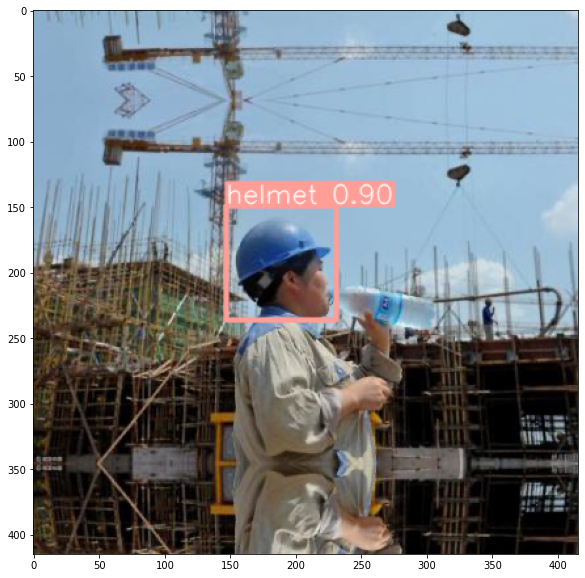

In [ ]:
plt.figure(figsize=(20, 10))

plt.imshow(np.squeeze(res.render()))
plt.show()

In [ ]:
res.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,147.394852,149.447662,231.549423,236.980225,0.900037,1,helmet
